# Assignment 4
## [Machine Learning 2018-1](https://fagonzalezo.github.io/ml-2018-1/)
**Submission:** Sunday May 6th

2 students per group

-------------------------------


In [25]:
import numpy as np
import pylab as pl

import matplotlib.pyplot as plt
from IPython.display import display, Image

%matplotlib inline

### 1. (2.0)
Consider the following neural network:

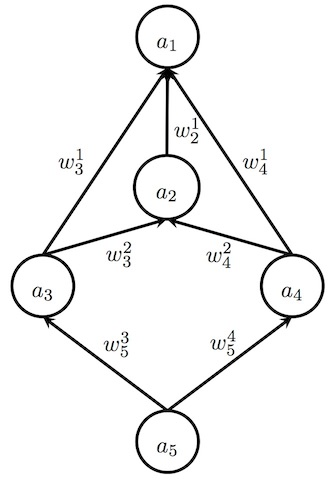

In [4]:
display(Image(filename='./img/nn.jpg'))

where $a_{i}=\sum_{j}w_{j}^{i}z_{j}$ , $z_{i}=f_{i}(a_{i})$ for
$i=1,2,3,4$, $z_{5}=a_{5}$ (an input neuron), $f_{2}(x)=\textrm{relu}(x)$,
and $f_{1}(x)=f_{3}(x)=f_{4}(x)=\textrm{sigmoid}(x)$. $\textrm{relu}(x)$
corresponds to a rectifier linear unit transfer function defined as:
$$
\textrm{relu}(x)=\begin{cases}
x & \textrm{if }x\ge0\\
0 & \textrm{otherwise}
\end{cases}
$$

1.a Write a function to simulate the neural network:

In [56]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

vSigmoid = np.vectorize(sigmoid)

def relu(x):
    return max(0, x)

def forward_propagate(x, w):
    '''
    x: input value for neuron 5
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    Returns: a pair of arrays (a, z), where 
             a has the activation values for each neuron, and
             z the output values for each neuron
    '''
    z = np.zeros(5)
    a = np.zeros(5)
    # your code here
    
    w13, w12, w14, w32, w42, w53, w54 = w
    a1, a2, a3, a4, a5 = a
    z1, z2, z3, z4, z5 = z
    
    a5 = x
    z5 = a5
    
    a[2:4] = z5 * w[5:7]
    z[2:4] = vSigmoid(a[2:4])
    a3, a4 = a[2:4]
    z3, z4 = z[2:4]
    print(z5 * w[5:7], a[2:4], z[2:4])
    
    
    a2 = w32*z3 + w42*z4
    z2 = relu(a2)
    
    a1 = w12*z2 + w13*z3 + w14*z4
    z1 = sigmoid(a1) 
    
    a = np.array([a1, a2, a3, a4, a5])
    z = np.array([z1, z2, z3, z4, z5])
    
    return (a, z)

x = 1
w = [1, 2, 1, 0, 3, 1, 2]
a, z = forward_propagate(x, w)

test_a = np.array([6.89663812, 2.64239123, 1.        , 2.        , 1.        ])
test_z = np.array([0.99898984, 2.64239123, 0.73105858, 0.88079708, 1.        ])
    
print("Test a:", np.isclose(test_a, a))
print(test_a, "\n", a)
print("Test z:", np.isclose(test_z, z))

[1, 2] [1. 2.] [0.73105858 0.88079708]
Test a: [ True  True  True  True  True]
[6.89663812 2.64239123 1.         2.         1.        ] 
 [6.89663812 2.64239123 1.         2.         1.        ]
Test z: [ True  True  True  True  True]


1.b Deduce the equations to calculate $\delta_{i}$ (the error value per
neuron) for all the neurons. Write a function that given a training
sample and the weights of the network calculate $\delta_{i}$ for
each neuron. Assume a square error loss:

$$ L_2(f, D) =\sum_{(x_{i},r_{i})\in D} (r_i - f(x_i))^2 $$

In [3]:
def bp(x, y, w):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    Returns: an array delta with the delta values for each
             neuron
    '''
    delta = np.zeros(5)
    return delta

1.c Write a function to update the neural network weights when a new training sample is shown using stochastic gradient descent.

In [4]:
def train_step(x, y, w, eta):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    eta: learning rate
    Returns: updated w array
    '''
    # Calculate dw
    dw = np.zeros(5)
    # Your code here
    
    a, z = forward_propagate(x, w)
    
    delta = bp(x, y, w)
    
    ####  ####
    
    w = w - eta*dw
    return w

1.d Use the previous function to train the network with these [training samples](http://fagonzalezo.github.io/ml/samples_assign4.txt).  Plot the evolution of the error and the predictions of the trained network. Write down the weights of the trained network.

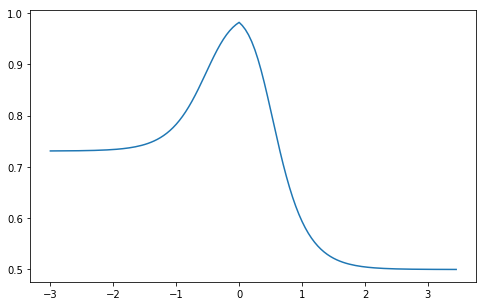

In [31]:
import os
import urllib
import pandas as pd

def downloadTxtFile(url, filename):
    path = "./data/"+str(filename)
    
    if os.path.isfile(path):
        # Load downloaded files
        data = open(path).read()
    else:
        # Load from URL and save to file
        with urllib.request.urlopen(url) as response:
            data = response.read().decode()
            file = open(path, "w")
            file.write(data)
            file.close()
    # Read the file
    df = pd.read_csv(path, sep=" ", header=None)
    
    return df

data = downloadTxtFile("http://fagonzalezo.github.io/ml/samples_assign4.txt", 'samples_assign4.txt')
X = data.values[:, 0]
Y = data.values[:, 1]

fig, (ax) = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(X, Y)
plt.show()

In [33]:
Y_pred = np.array([])
w = np.random.rand(7)
for x, y_true in zip(X, Y):
    a, z = forward_propagate(x, w)
    z1 = z[0]
    y_pred = z1
    delta = bp(x, y_pred, w)

## 2. (1.0) The hangman

Design a function able to find the missing characters from a word. The function must work as follows:

```
>>> hangman("pe_p_e")
'people'

>>> hangman("phi__sop_y")
'philosophy'

>>> hangman("si_nif_c_nc_")
'significance'

>>> hangman("kn__l_d_e")
'knowledge'

>>> hangman("inte_r_ga_i_n")
'interrogation'
```

The function must be able to deal with up to 4 unknowns in arbitrary length words. The function must work in a reasonable time (max 30 seconds in a laptop). 

In [2]:
def hangman(word):
    ### your code here
    return ''

Using TensorFlow backend.


### 3. (2.0) Bird classification. 

1. Direct prediction
   * Download the dataset birds from http://www-cvr.ai.uiuc.edu/ponce_grp/data/.
   * Use [Keras](https://keras.io/) and the [MobileNet](https://keras.io/applications/#mobilenet) pre-trained model, to classify the images in the birds dataset. Construct a confusion matrix that relates the bird classes with the 10 most frequent classes from ImageNet predicted by the model.
2. Transfer learning
   * Use the pre-trained MobileNet model as a feature extractor. Create a new model that replaces the top part of MobileNet with two layers of 256 and 6 neurons respectively.
   * Change the attribute trainable of the other layers to be False. This will prevent the weights of these layers to be changed during training.
   * Train the model with the training images from the bird dataset. 
   * Evaluate the performance over the test dataset reporting the results in a confusion matrix. Discuss the results. 
3. Fine tuning
   * Repeat the experiment from the last question, but this time allow all the layers to be trained. 
   * Compare and discuss the results.

----------------------

The assignment must be submitted as a [Jupyter notebook](http://jupyter.org/) through the following [Dropbox file request](https://www.dropbox.com/request/KqkTCJ1gENtNkNRaWomX), before midnight of the deadline date. The file must be named as ml-assign4-unalusername1-unalusername2.ipynb, where unalusername is the user name assigned by the university (include the usernames of all the members of the group). Check that the notebook executes properly and that the corresponding outputs render appropriately.  If there are several files, please put them in a zip file.